In [21]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


'tf'

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from PIL import Image
import glob
import cv2
train_images=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/data1/cats/train/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (50,50))
    train_images.append([output,0])

In [0]:
from PIL import Image
import glob
import cv2
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/data1/dogs/train/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal,(50,50))
    train_images.append([output,1])

In [0]:
import random
random.shuffle(train_images)

In [0]:
x_train=[]
y_train=[]
for im,label in train_images:
  x_train.append(im)
  y_train.append(label)

In [0]:
x_train=np.array(x_train).reshape(-1,50,50,3)

In [28]:
train_images[0]

[array([[[254, 243, 221],
         [254, 244, 225],
         [253, 245, 228],
         ...,
         [ 80,  81,  64],
         [ 92,  87,  69],
         [201, 181, 150]],
 
        [[252, 239, 212],
         [253, 241, 218],
         [255, 246, 226],
         ...,
         [ 94,  88,  67],
         [ 79,  76,  56],
         [158, 145, 116]],
 
        [[229, 211, 182],
         [230, 216, 188],
         [246, 233, 209],
         ...,
         [103,  92,  65],
         [109, 104,  80],
         [119, 108,  80]],
 
        ...,
 
        [[ 25,  30,  28],
         [ 22,  27,  26],
         [ 19,  24,  22],
         ...,
         [ 45,  58,  76],
         [ 45,  61,  78],
         [ 43,  61,  78]],
 
        [[ 22,  28,  25],
         [ 24,  29,  27],
         [ 23,  29,  26],
         ...,
         [ 35,  48,  66],
         [ 35,  51,  68],
         [ 50,  68,  85]],
 
        [[ 22,  27,  25],
         [ 31,  37,  34],
         [ 45,  50,  48],
         ...,
         [ 29,  43,  61],
  

In [29]:
type(x_train)
x_train.shape
x_train[0]

array([[[254, 243, 221],
        [254, 244, 225],
        [253, 245, 228],
        ...,
        [ 80,  81,  64],
        [ 92,  87,  69],
        [201, 181, 150]],

       [[252, 239, 212],
        [253, 241, 218],
        [255, 246, 226],
        ...,
        [ 94,  88,  67],
        [ 79,  76,  56],
        [158, 145, 116]],

       [[229, 211, 182],
        [230, 216, 188],
        [246, 233, 209],
        ...,
        [103,  92,  65],
        [109, 104,  80],
        [119, 108,  80]],

       ...,

       [[ 25,  30,  28],
        [ 22,  27,  26],
        [ 19,  24,  22],
        ...,
        [ 45,  58,  76],
        [ 45,  61,  78],
        [ 43,  61,  78]],

       [[ 22,  28,  25],
        [ 24,  29,  27],
        [ 23,  29,  26],
        ...,
        [ 35,  48,  66],
        [ 35,  51,  68],
        [ 50,  68,  85]],

       [[ 22,  27,  25],
        [ 31,  37,  34],
        [ 45,  50,  48],
        ...,
        [ 29,  43,  61],
        [ 35,  50,  67],
        [ 59,  75,  91]]

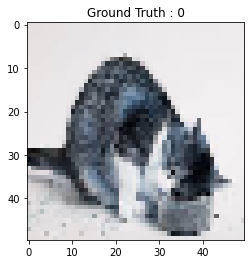

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50,:,:])
plt.title('Ground Truth : {}'.format(y_train[50]))
plt.show()


In [0]:
test_images=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/data1/cats/test/*.jpg'): 
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (50,50))
    test_images.append([output,0])

In [0]:
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/data1/dogs/test/*.jpg'): 
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (50,50))
    test_images.append([output,1])

In [0]:
random.shuffle(test_images)

In [0]:
x_test=[]
y_test=[]
for im,label in test_images:
  x_test.append(im)
  y_test.append(label)

In [0]:
x_test=np.array(x_test).reshape(-1,50,50,3)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [40]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128)

Train on 544 samples, validate on 52 samples
Epoch 1/20
544/544 [==============================] - 51s 95ms/step - loss: 9.6931 - accuracy: 0.5074 - val_loss: 0.6951 - val_accuracy: 0.4038
Epoch 2/20
544/544 [==============================] - 53s 97ms/step - loss: 0.7102 - accuracy: 0.4412 - val_loss: 0.6926 - val_accuracy: 0.5962
Epoch 3/20
544/544 [==============================] - 50s 92ms/step - loss: 0.6926 - accuracy: 0.5809 - val_loss: 0.6921 - val_accuracy: 0.5962
Epoch 4/20
544/544 [==============================] - 50s 92ms/step - loss: 0.6921 - accuracy: 0.5809 - val_loss: 0.6916 - val_accuracy: 0.5962
Epoch 5/20
544/544 [==============================] - 49s 91ms/step - loss: 0.6918 - accuracy: 0.5809 - val_loss: 0.6909 - val_accuracy: 0.5962
Epoch 6/20
544/544 [==============================] - 50s 92ms/step - loss: 0.6912 - accuracy: 0.5809 - val_loss: 0.6903 - val_accuracy: 0.5962
Epoch 7/20
544/544 [==============================] - 49s 90ms/step - loss: 0.6905 - accura

In [0]:
import pickle
with open("/content/drive/My Drive/Colab Notebooks/model.pk2",'wb') as file:
      pickle.dump(model,file)

In [0]:
x=model.predict_classes(x_train[[50],:])

In [44]:
print(x[0])

0
